In [12]:
import pandas as pd
import numpy as np
from data_storage import create_connection
import matplotlib.pyplot as plt

In [13]:
connection = create_connection("../database/crypto_billionairs.db")

In [46]:
sql = 'SELECT table_name'\
        ', annualized_return as annualized_return'\
        ', annualized_return / trades_count AS ann_return_per_trade'\
        ', win_rate AS win_rate'\
        ', sharpe_ratio_annualized as sharpe_ratio'\
        ', sortino_ratio_annualized as sortino_ratio'\
        ', maximum_drawdown as maximum_drawdown'\
        ', calmar_ratio_annualized as calmar_ratio'\
        ' FROM cryptocurrencies_risk_metrics_1m_abnormal_day_ml_threshold'\
        ' where timehorizon >= 365'
       

df = pd.read_sql_query(f"{sql}", connection)
df.head()

,table_name,annualized_return,ann_return_per_trade,win_rate,sharpe_ratio,sortino_ratio,maximum_drawdown,calmar_ratio
0,no_0_threshold_ensemble_long_ADA_1,12.051090,0.033017,53.150685,20.850254,2.526250,-0.207492,5.862978
1,no_0_threshold_ensemble_long_BCH_1,-3.413077,-0.005670,50.000000,-12.151466,-1.766080,-0.889355,-0.953379
2,no_0_threshold_ensemble_long_BSV_1,-7.517525,-0.020653,47.802198,-11.375123,-1.561076,-0.679517,-1.106305
3,no_0_threshold_ensemble_long_BTC_1,2.249213,0.001546,52.439863,28.903735,2.595201,-0.799659,1.579206
4,no_0_threshold_ensemble_long_BTG_1,-3.692927,-0.005976,49.190939,-14.205675,-1.978204,-0.960893,-0.989716


In [34]:
df["threshold"] = df["table_name"].str.split("_").str[1].astype(int)
df["type"] = df["table_name"].str.split("_").str[4]
df = df.drop(["table_name"], axis = 1)

In [35]:
df_plt = df.groupby(by=["type", "threshold"]).mean()

In [48]:
df_plt.xs("long")

,annualized_return,ann_return_per_trade,win_rate,sharpe_ratio,sortino_ratio,maximum_drawdown,calmar_ratio
threshold,,,,,,,
0,10.809947,0.050833,49.770152,3.647240,0.468166,-0.671466,2.474279
1,10.809947,0.050833,49.770152,3.647240,0.468166,-0.671466,2.474279
2,10.809947,0.050833,49.770152,3.647240,0.468166,-0.671466,2.474279
3,10.809947,0.050833,49.770152,3.647240,0.468166,-0.671466,2.474279
4,10.809947,0.050833,49.770152,3.647240,0.468166,-0.671466,2.474279
5,10.809947,0.050833,49.770152,3.647240,0.468166,-0.671466,2.474279
6,10.809947,0.050833,49.770152,3.647240,0.468166,-0.671466,2.474279
7,10.813682,0.050838,49.776998,3.665200,0.470565,-0.670939,2.475035
8,30.329857,0.142728,50.490147,12.016007,1.754939,-0.563271,5.867933


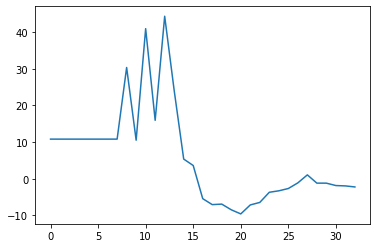

In [27]:
plt.plot(df_plt.xs("long")["annualized_return"])
plt.show()

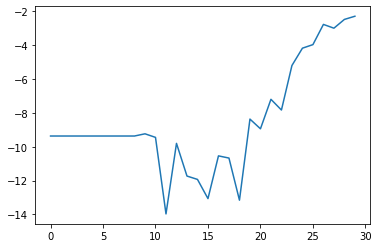

In [28]:
plt.plot(df_plt.xs("short")["annualized_return"])
plt.show()

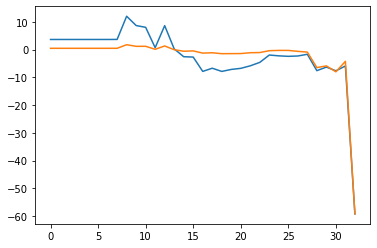

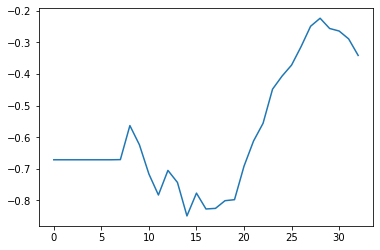

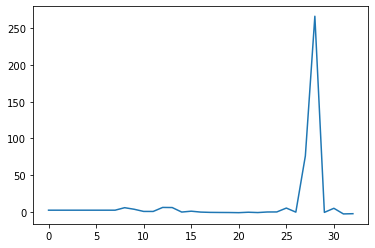

In [29]:
plt.plot(df_plt.xs("long")["sharpe_ratio"])
plt.plot(df_plt.xs("long")["sortino_ratio"])
plt.show()
plt.plot(df_plt.xs("long")["maximum_drawdown"])
plt.show()
plt.plot(df_plt.xs("long")["calmar_ratio"])
plt.show()

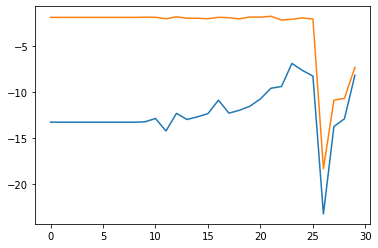

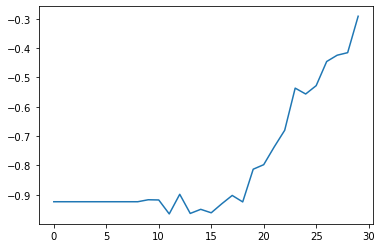

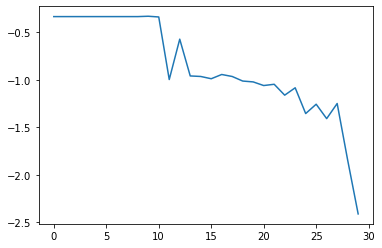

In [43]:
plt.plot(df_plt.xs("short")["sharpe_ratio"])
plt.plot(df_plt.xs("short")["sortino_ratio"])
plt.show()
plt.plot(df_plt.xs("short")["maximum_drawdown"])
plt.show()
plt.plot(df_plt.xs("short")["calmar_ratio"])
plt.show()

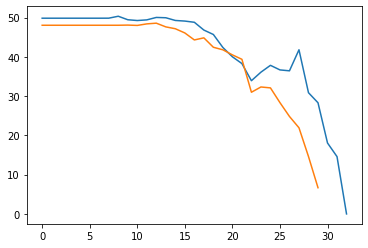

In [22]:
plt.plot(df_plt.xs("long")["win_rate"])
plt.plot(df_plt.xs("short")["win_rate"])
plt.show()